Author: KuoChen Huang

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('../data/Frogs_MFCCs.csv')

x_data = dataset.iloc[:, :-4]
y_data = dataset.iloc[:, -4:-1]

x_training, x_testing, y_training, y_testing = train_test_split(x_data, y_data, test_size = 0.3, random_state = 526)

In [3]:
x_training.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
1360,1.0,0.213504,0.270196,0.498984,0.138769,-0.001015,-0.114710,0.075750,0.239891,-0.084869,...,0.299839,-0.201315,-0.169640,0.175490,0.117356,-0.044406,-0.137196,-0.117280,0.123393,0.166512
2328,1.0,0.177790,0.140488,0.525766,0.193925,-0.078526,-0.182234,0.120085,0.280281,-0.007977,...,0.255650,-0.134378,-0.178376,0.097089,0.123520,-0.039748,-0.080865,0.004102,0.190498,0.160136
1926,1.0,0.303753,0.140927,0.536417,0.216087,-0.000319,-0.120920,0.086681,0.274563,0.015642,...,0.421249,-0.010804,-0.270545,0.017082,0.173229,-0.022801,-0.148422,-0.088603,0.088285,0.224479
1332,1.0,0.357981,0.346439,0.506426,0.088108,0.030308,-0.070965,0.082785,0.300255,-0.027072,...,0.267118,-0.278758,-0.224236,0.206549,0.105818,-0.118106,-0.063160,-0.007875,0.194263,0.169475
2272,1.0,0.114527,0.048106,0.475947,0.220609,-0.033166,-0.217028,-0.036408,0.196728,0.066067,...,0.220457,-0.147305,-0.228344,0.080177,0.145465,-0.048835,-0.167525,-0.137310,0.095916,0.188748


In [4]:
y_training.head()

,Family,Genus,Species
1360,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2328,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1926,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1332,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2272,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

Exact Match: whether all classes are exactly matched with the label. 

Hamming Score: the fraction of correct predictions compared to the total labels.
 
Hamming Loss: how many times on average, the relevance of an example to a class label is incorrectly predicted. 

#### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, hamming_loss
# Since i don't standardize the data, it sometimes shows warning: "ConvergenceWarning: Solver terminated early (max_iter=100)."
# Thus, I import the warnings here and try to ignore it
import warnings
warnings.filterwarnings('ignore')

In [6]:
# using Gaussian kernels -> kernal = 'rbf'
SVC_model = SVC(kernel = 'rbf', random_state = 526, max_iter = 100)

c_range = np.logspace(-3, 6, 10)
gamma_range = np.arange(0.1, 2.1, 0.1)

parameters = {'C':c_range, 'gamma':gamma_range}

y_Family = y_training['Family']
y_Genus = y_training['Genus']
y_Species = y_training['Species']

In [7]:
clf1 = GridSearchCV(SVC_model, parameters, cv = 10).fit(x_training, y_Family)
bestClf_Family = clf1.best_estimator_

y_Test_Family = y_testing['Family']
y_predict_Family = bestClf_Family.predict(x_testing)

# clf1.best_params_ -> {'C': __ , 'gamma': __}
c1, gamma1 = clf1.best_params_['C'], clf1.best_params_['gamma']
print("-------------------------Family---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(c1))
print("Best params: width of the Gaussian Kernel(gamma): " + str(gamma1))
print("The accuracy score is: ", accuracy_score(y_Test_Family, y_predict_Family))

-------------------------Family---------------------------
Best params: weight of the SVM penalty(C): 10.0
Best params: width of the Gaussian Kernel(gamma): 1.9000000000000001
The accuracy score is:  0.9930523390458545


In [8]:
clf2 = GridSearchCV(SVC_model, parameters, cv = 10).fit(x_training, y_Genus)
bestClf_Genus = clf2.best_estimator_

y_Test_Genus = y_testing['Genus']
y_predict_Genus = bestClf_Genus.predict(x_testing)

c2, gamma2 = clf2.best_params_['C'], clf2.best_params_['gamma']
print("-------------------------Genus---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(c2))
print("Best params: width of the Gaussian Kernel(gamma): " + str(gamma2))
print("The accuracy score is: ", accuracy_score(y_Test_Genus, y_predict_Genus))

-------------------------Genus---------------------------
Best params: weight of the SVM penalty(C): 10.0
Best params: width of the Gaussian Kernel(gamma): 1.6
The accuracy score is:  0.9898100972672533


In [9]:
clf3 = GridSearchCV(SVC_model, parameters, cv = 10).fit(x_training, y_Species)
bestClf_Species = clf3.best_estimator_

y_Test_Species = y_testing['Species']
y_predict_Species = bestClf_Species.predict(x_testing)

c3, gamma3 = clf3.best_params_['C'], clf3.best_params_['gamma']
print("-------------------------Species---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(c3))
print("Best params: width of the Gaussian Kernel(gamma): " + str(gamma3))
print("The accuracy score is: ", accuracy_score(y_Test_Species, y_predict_Species))

-------------------------Species---------------------------
Best params: weight of the SVM penalty(C): 10.0
Best params: width of the Gaussian Kernel(gamma): 1.6
The accuracy score is:  0.9907364520611394


#### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [10]:
from sklearn import preprocessing
from sklearn.svm import LinearSVC

In [11]:
std_scaler = preprocessing.StandardScaler()

std_xTraining = std_scaler.fit_transform(x_training)
std_xTesting = std_scaler.transform(x_testing)

In [12]:
# here the parameter only contain C, since gamma is for Gaussian Kernal
parameters = {'C': c_range}

# multi_class = "ovr" -> trains n_classes one-vs-rest classifiers
# since n_samples > n_features, so I use dual = False
SVC_L1_Model = LinearSVC(penalty = 'l1', multi_class = 'ovr', dual = False, random_state = 526)

In [13]:
L1_clf1 = GridSearchCV(SVC_L1_Model, parameters, cv = 10).fit(std_xTraining, y_Family)
L1_bestClf_Family = L1_clf1.best_estimator_

L1_y_predict_Family = L1_bestClf_Family.predict(std_xTesting)

l1_c1 = L1_clf1.best_params_['C']

print("-------------------------L1_Family---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(l1_c1))
print("The accuracy score is: ", accuracy_score(y_Test_Family, L1_y_predict_Family))

-------------------------L1_Family---------------------------
Best params: weight of the SVM penalty(C): 1.0
The accuracy score is:  0.9393237610004632


In [14]:
L1_clf2 = GridSearchCV(SVC_L1_Model, parameters, cv = 10).fit(std_xTraining, y_Genus)
L1_bestClf_Genus = L1_clf2.best_estimator_

L1_y_predict_Genus = L1_bestClf_Genus.predict(std_xTesting)

l1_c2 = L1_clf2.best_params_['C']

print("-------------------------L1_Genus---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(l1_c2))
print("The accuracy score is: ", accuracy_score(y_Test_Genus, L1_y_predict_Genus))

-------------------------L1_Genus---------------------------
Best params: weight of the SVM penalty(C): 10.0
The accuracy score is:  0.9541454377026402


In [15]:
L1_clf3 = GridSearchCV(SVC_L1_Model, parameters, cv = 10).fit(std_xTraining, y_Species)

L1_bestClf_Species = L1_clf3.best_estimator_
L1_y_predict_Species = L1_bestClf_Species.predict(std_xTesting)

l1_c3 = L1_clf3.best_params_['C']

print("-------------------------L1_Species---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(l1_c3))
print("The accuracy score is: ", accuracy_score(y_Test_Species, L1_y_predict_Species))

-------------------------L1_Species---------------------------
Best params: weight of the SVM penalty(C): 1.0
The accuracy score is:  0.9578508568781844


#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
smote = SMOTE()

smote_xTraining1, smote_y_Family = smote.fit_resample(std_xTraining, y_Family)
smote_xTraining2, smote_y_Genus = smote.fit_resample(std_xTraining, y_Genus)
smote_xTraining3, smote_y_Species = smote.fit_resample(std_xTraining, y_Species)

smote_xTesting1, smote_y_Testing_Family = smote.fit_resample(std_xTesting, y_Test_Family)
smote_xTesting2, smote_y_Testing_Genus = smote.fit_resample(std_xTesting, y_Test_Genus)
smote_xTesting3, smote_y_Testing_Species = smote.fit_resample(std_xTesting, y_Test_Species)

In [18]:
print("-------------------------Training Set---------------------------")
print("Counts(Family): " + str(smote_y_Family.value_counts()))
print("Counts(Genus): " + str(smote_y_Genus.value_counts()))
print("Counts(Species): " + str(smote_y_Species.value_counts()))

print("-------------------------Testing Set---------------------------")
print("Counts(Family): " + str(smote_y_Testing_Family.value_counts()))
print("Counts(Genus): " + str(smote_y_Testing_Genus.value_counts()))
print("Counts(Species): " + str(smote_y_Testing_Species.value_counts()))

-------------------------Training Set---------------------------
Counts(Family): Leptodactylidae    3069
Dendrobatidae      3069
Hylidae            3069
Bufonidae          3069
Name: Family, dtype: int64
Counts(Genus): Adenomera        2886
Ameerega         2886
Osteocephalus    2886
Hypsiboas        2886
Dendropsophus    2886
Leptodactylus    2886
Scinax           2886
Rhinella         2886
Name: Genus, dtype: int64
Counts(Species): AdenomeraHylaedactylus    2412
Ameeregatrivittata        2412
AdenomeraAndre            2412
OsteocephalusOophagus     2412
HypsiboasCordobae         2412
HylaMinuta                2412
HypsiboasCinerascens      2412
LeptodactylusFuscus       2412
ScinaxRuber               2412
Rhinellagranulosa         2412
Name: Species, dtype: int64
-------------------------Testing Set---------------------------
Counts(Family): Hylidae            1351
Leptodactylidae    1351
Dendrobatidae      1351
Bufonidae          1351
Name: Family, dtype: int64
Counts(Genus): Hypsib

In [19]:
parameters = {'C': c_range}
SVC_L1_Model = LinearSVC(penalty = 'l1', multi_class = 'ovr', dual = False, random_state = 526)

In [20]:
smote_L1_clf1 = GridSearchCV(SVC_L1_Model, parameters, cv = 10).fit(smote_xTraining1, smote_y_Family)
smote_L1_bestClf_Family = smote_L1_clf1.best_estimator_

smote_L1_y_predict_Family = smote_L1_bestClf_Family.predict(smote_xTesting1)

smote_l1_c1 = smote_L1_clf1.best_params_['C']

print("-------------------------Smote L1_Family---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(smote_l1_c1))
print("The accuracy score is: ", accuracy_score(smote_y_Testing_Family, smote_L1_y_predict_Family))

-------------------------Smote L1_Family---------------------------
Best params: weight of the SVM penalty(C): 1000.0
The accuracy score is:  0.9433752775721688


In [21]:
smote_L1_clf2 = GridSearchCV(SVC_L1_Model, parameters, cv = 10).fit(smote_xTraining2, smote_y_Genus)
smote_L1_bestClf_Genus = smote_L1_clf2.best_estimator_

smote_L1_y_predict_Genus = smote_L1_bestClf_Genus.predict(smote_xTesting2)

smote_l1_c2 = smote_L1_clf2.best_params_['C']

print("-------------------------Smote L1_Genus---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(smote_l1_c2))
print("The accuracy score is: ", accuracy_score(smote_y_Testing_Genus, smote_L1_y_predict_Genus))

-------------------------Smote L1_Genus---------------------------
Best params: weight of the SVM penalty(C): 1.0
The accuracy score is:  0.948378164556962


In [22]:
smote_L1_clf3 = GridSearchCV(SVC_L1_Model, parameters, cv = 10).fit(smote_xTraining3, smote_y_Species)
smote_L1_bestClf_Species = smote_L1_clf3.best_estimator_

smote_L1_y_predict_Species = smote_L1_bestClf_Species.predict(smote_xTesting3)

smote_l1_c3 = smote_L1_clf3.best_params_['C']

print("-------------------------Smote L1_Species---------------------------")
print("Best params: weight of the SVM penalty(C): " + str(smote_l1_c3))
print("The accuracy score is: ", accuracy_score(smote_y_Testing_Species, smote_L1_y_predict_Species))

-------------------------Smote L1_Species---------------------------
Best params: weight of the SVM penalty(C): 10.0
The accuracy score is:  0.9563789868667918


Conclusion: In this problem, Gaussian kernels(RBF) performs the best, which has the higher accuracy than L1-penalized SVMs and the model using SMOTE.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

Monte-Carlo Simulation:  
Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know. 

Here, I'll choose Silhouette method to deal with this problem. 
The Silhouette score is used to measure the degree of separation between clusters.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_K = 1
maxScore = 0

for k in range(2, 51):
    model = KMeans(n_clusters = k)
    labels = model.fit_predict(x_data)
    score = silhouette_score(x_data, labels, metric = 'euclidean')
    if score > maxScore:
        maxScore = score
        best_K = k
print('best k: ', best_K)
print('Max Silhouettes score: ', maxScore)

best k:  4
Max Silhouettes score:  0.3787509343305295


Just my practice. Below is the Elbow Plot.

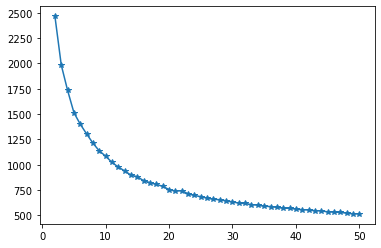

In [24]:
import matplotlib.pyplot as plt

clusters = []
inertia_vals = []

for k in range(2, 51):
    # train clustering with the specified K
    model = KMeans(n_clusters = k, random_state = 7)
    model.fit(x_data)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

# plot the inertia vs K values
plt.plot(range(2, 51, 1), inertia_vals, marker='*')
plt.show()

### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [25]:
model = KMeans(n_clusters = best_K, random_state = 526)
labels = model.fit_predict(x_data)

In [26]:
pd.Series(labels).value_counts()

1    3568
2    1982
3    1031
0     614
dtype: int64

In [27]:
y_all_Family = y_data['Family']
y_all_Genus = y_data['Genus']
y_all_Species = y_data['Species']

In [28]:
for i in range(best_K):
    index_of_cluster = list(pd.Series(labels).index[labels == i])
    # count the nums in each category and find the majority
    majority_Family = y_all_Family[index_of_cluster].value_counts(sort = True, ascending = False).index[0]
    majority_Genus = y_all_Genus[index_of_cluster].value_counts(sort = True, ascending = False).index[0]
    majority_Species = y_all_Species[index_of_cluster].value_counts(sort = True, ascending = False).index[0]
    
    print()
    print('-------------------------Cluster ' + str(i) + '---------------------------')
    print('Majority in Family:', majority_Family)
    print('Majority in Genus:', majority_Genus)
    print('Majority in Species:', majority_Species)


-------------------------Cluster 0---------------------------
Majority in Family: Hylidae
Majority in Genus: Hypsiboas
Majority in Species: HypsiboasCinerascens

-------------------------Cluster 1---------------------------
Majority in Family: Leptodactylidae
Majority in Genus: Adenomera
Majority in Species: AdenomeraHylaedactylus

-------------------------Cluster 2---------------------------
Majority in Family: Hylidae
Majority in Genus: Hypsiboas
Majority in Species: HypsiboasCordobae

-------------------------Cluster 3---------------------------
Majority in Family: Dendrobatidae
Majority in Genus: Ameerega
Majority in Species: Ameeregatrivittata


### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [29]:
def getHammingScore(predict, label):
    
    total = predict.shape[0] * predict.shape[1]
    count = 0
    
    for i, r in enumerate(predict.iterrows()):
        for j in range(predict.shape[1]):
            if predict.iloc[i].tolist()[j] == label.iloc[i].tolist()[j]:
                count += 1
    return count/total

In [30]:
def getHammingDistance(predict, label):

    count = 0
    for i, row in enumerate(predict.iterrows()):
        for j in range(predict.shape[1]):
            if predict.iloc[i].tolist()[j] != label.iloc[i].tolist()[j]:
                count += 1
    return count

In [31]:
hammingDistance_list = list()
hammingScore_list = list()
hammingLoss_list = list()

# the question asks to perfrom for 50 times
for i in range(50):
    model = KMeans(n_clusters = best_K, random_state = 526)
    labels = model.fit_predict(x_data)
    labels = pd.Series(labels)
    
    # store the (three) majority of columns in each cluster
    Majority_in_each_cluster = dict()
    # store the index of data in each cluster
    index_of_cluster = dict()
    
    for k in range(best_K):
        index_of_cluster[k] = list(pd.Series(labels).index[labels == k])
        majority_Family = y_all_Family[index_of_cluster[k]].value_counts(sort = True, ascending = False).index[0]
        majority_Genus = y_all_Genus[index_of_cluster[k]].value_counts(sort = True, ascending = False).index[0]
        majority_Species = y_all_Species[index_of_cluster[k]].value_counts(sort = True, ascending = False).index[0]
        
        Majority_in_each_cluster[k] = [majority_Family, majority_Genus, majority_Species]
        
    # create empty dataframe with three columns(Family, Genus, Species)
    y_labels = pd.DataFrame(columns = y_data.columns, index = y_data.index)
    
    # fill in the value
    for k in range(best_K):
        for index in index_of_cluster[k]:
            # find the corresponding value
            y_labels.iloc[index] = Majority_in_each_cluster[k]
    
    hammingDistance = getHammingDistance(y_labels, y_data) # y_labels and y_data are both dataframe
    hammingDistance_list.append(hammingDistance)
    
    hammingScore = getHammingScore(y_labels, y_data)
    hammingScore_list.append(hammingScore)
    
    hammingLoss = 1 - hammingScore
    hammingLoss_list.append(hammingLoss)

print('Average Hamming Disance', round(np.array(hammingDistance_list).mean(), 2))
print('Average Hamming Score', round(np.array(hammingScore_list).mean(), 2))
print('Average Hamming Loss', round(np.array(hammingLoss_list).mean(), 2))

Average Hamming Disance 4801.0
Average Hamming Score 0.78
Average Hamming Loss 0.22


## Reference:

Q1.  
-> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Q2.  
-> https://towardsdatascience.com/unsupervised-learning-techniques-using-python-k-means-and-silhouette-score-for-clustering-d6dd1f30b660 
 
-> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html